In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from snntorch import spikeplot as splt
import os

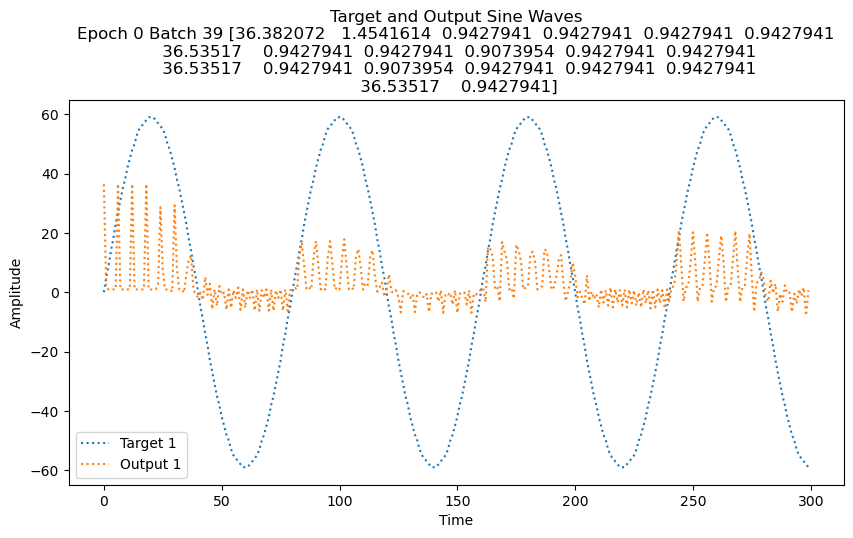

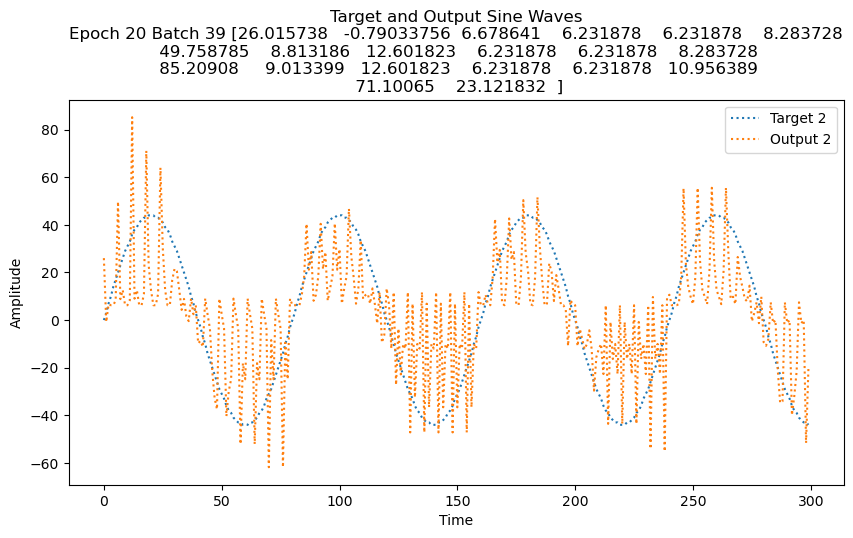

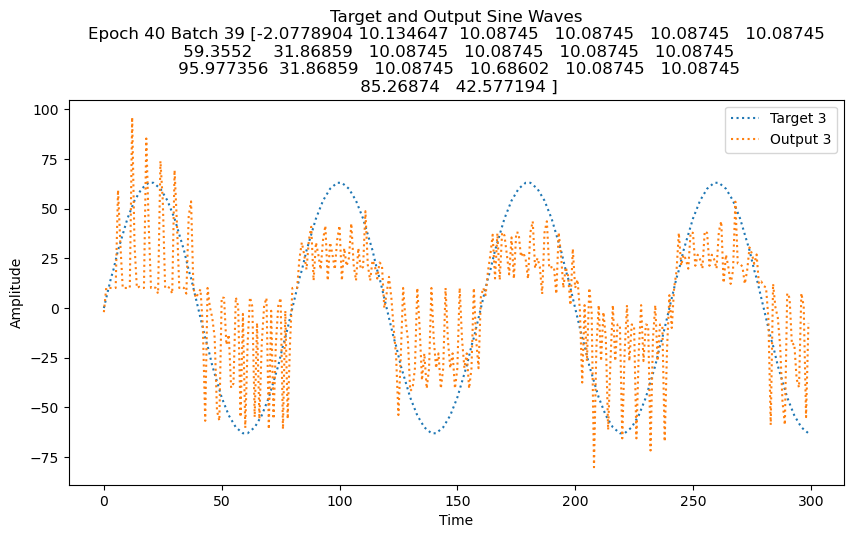

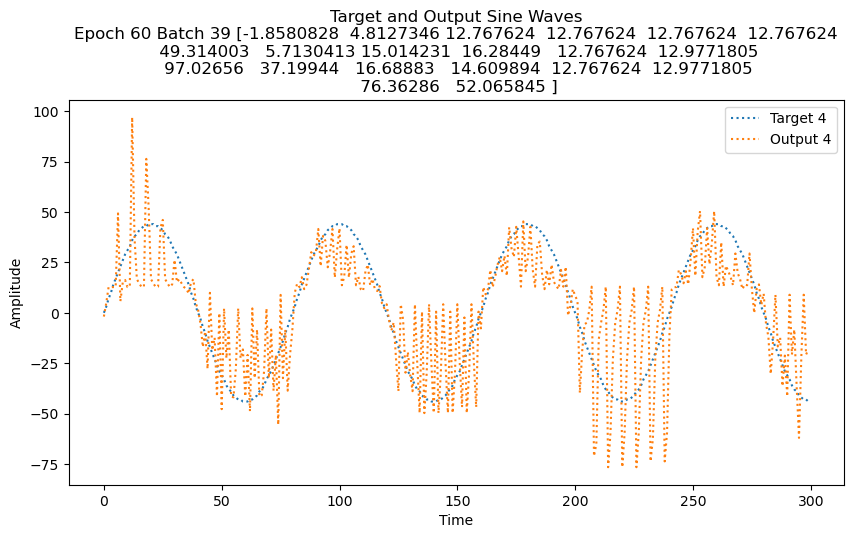

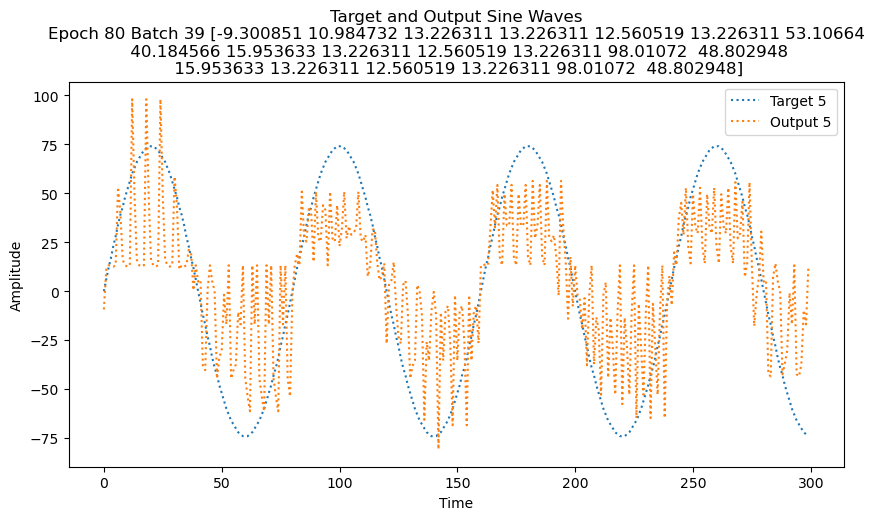

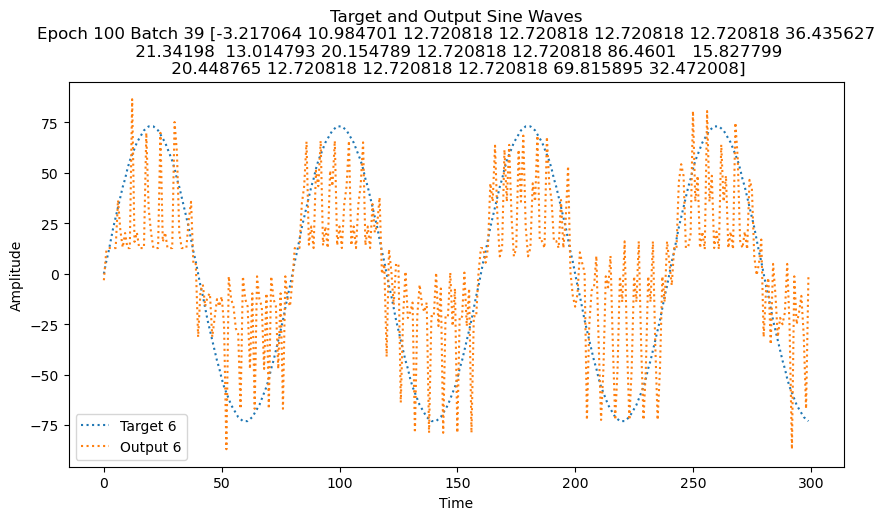

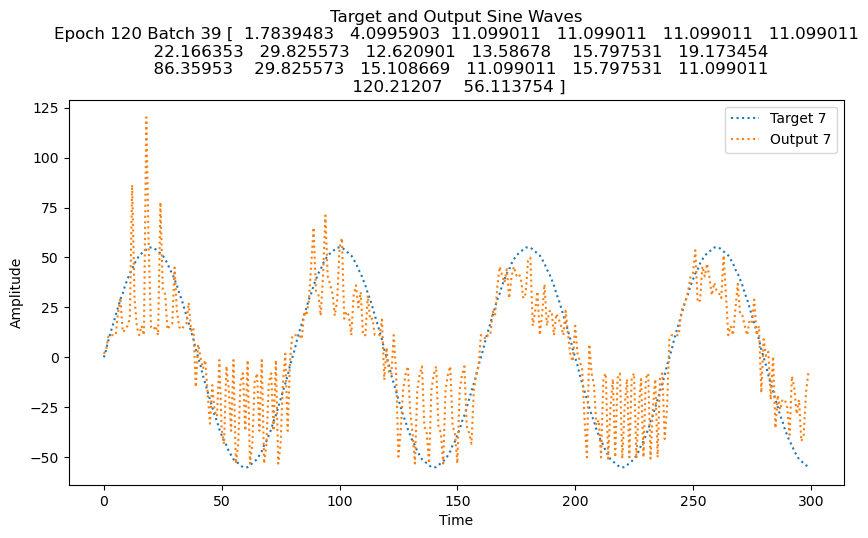

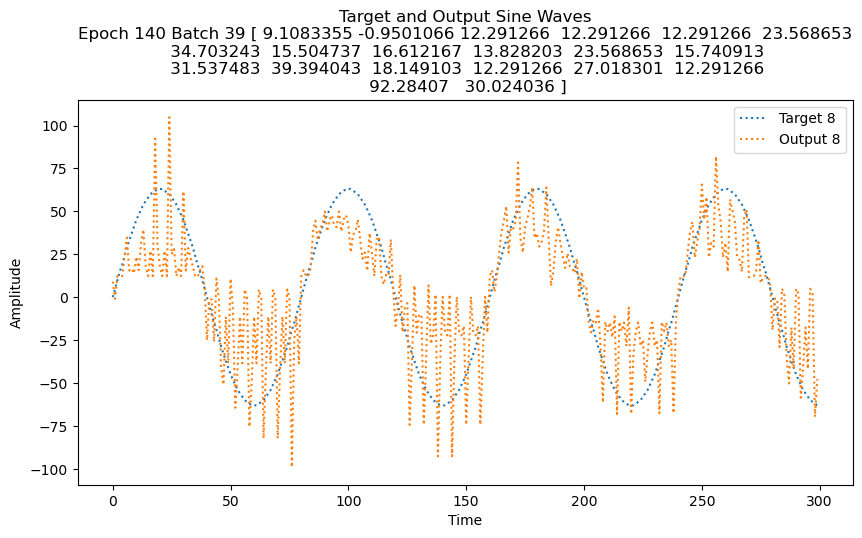

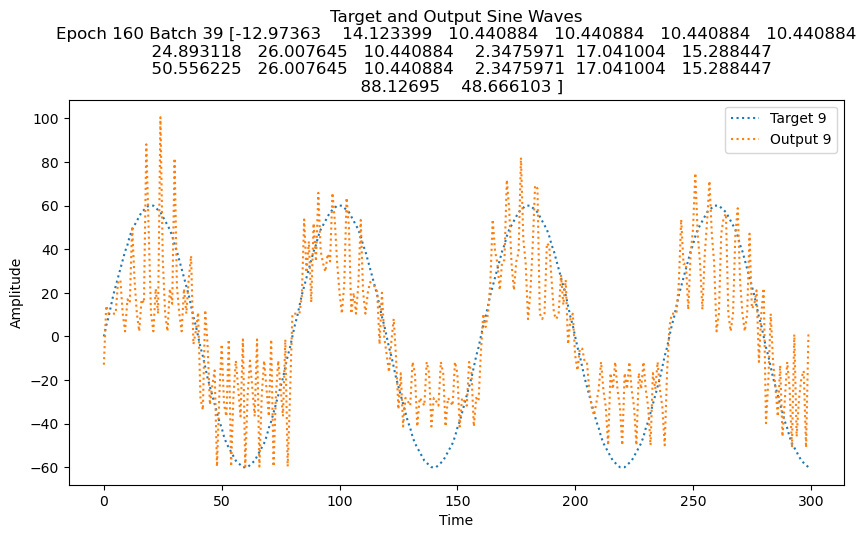

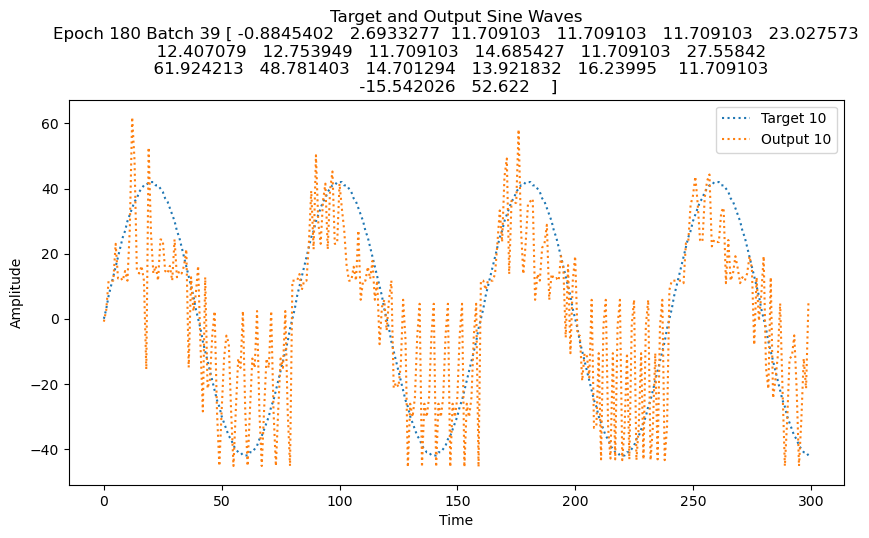

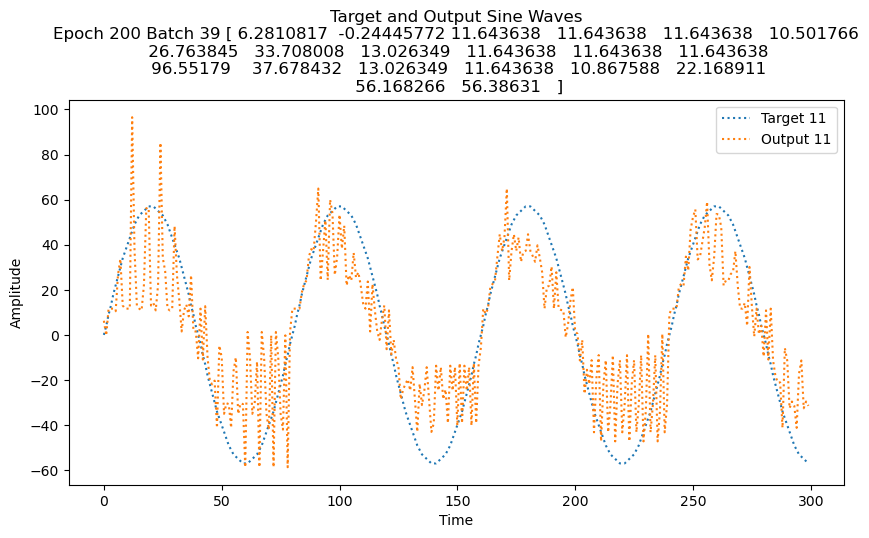

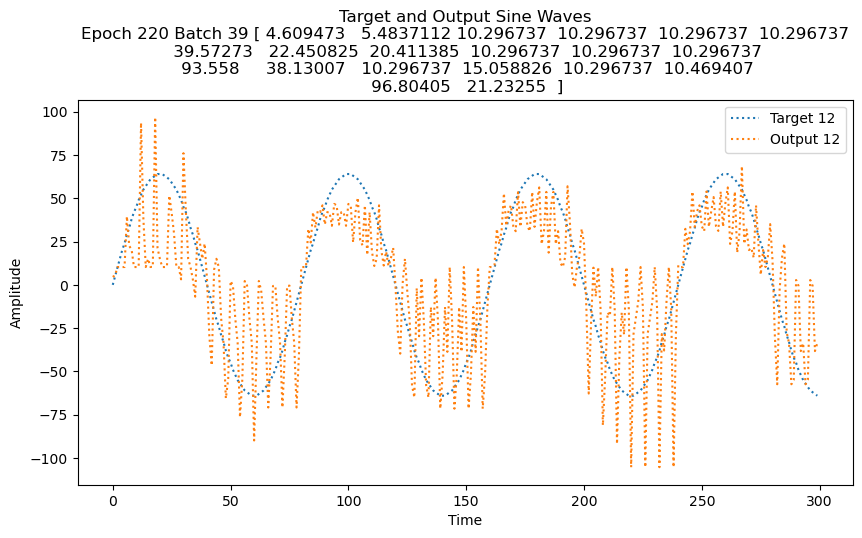

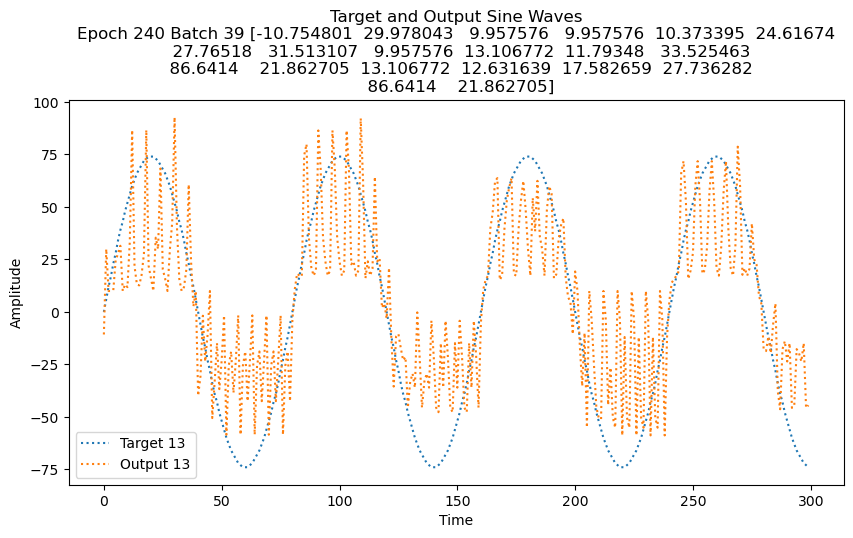

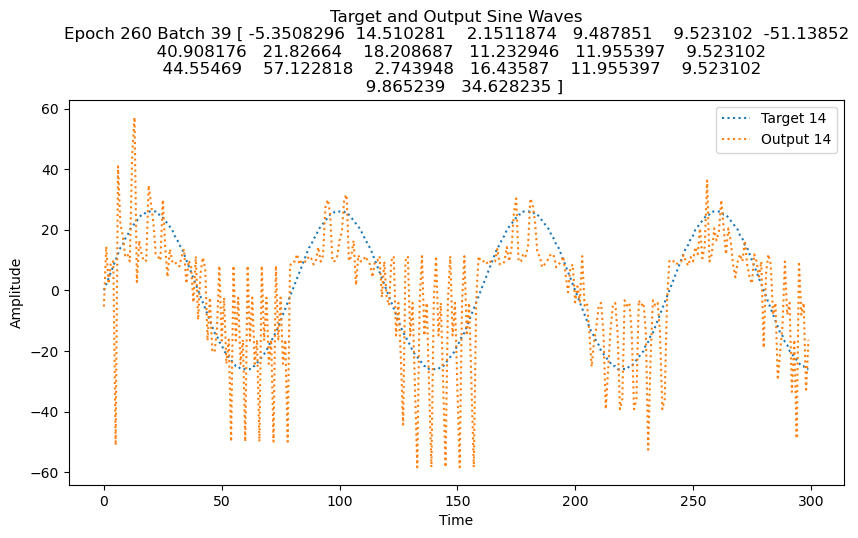

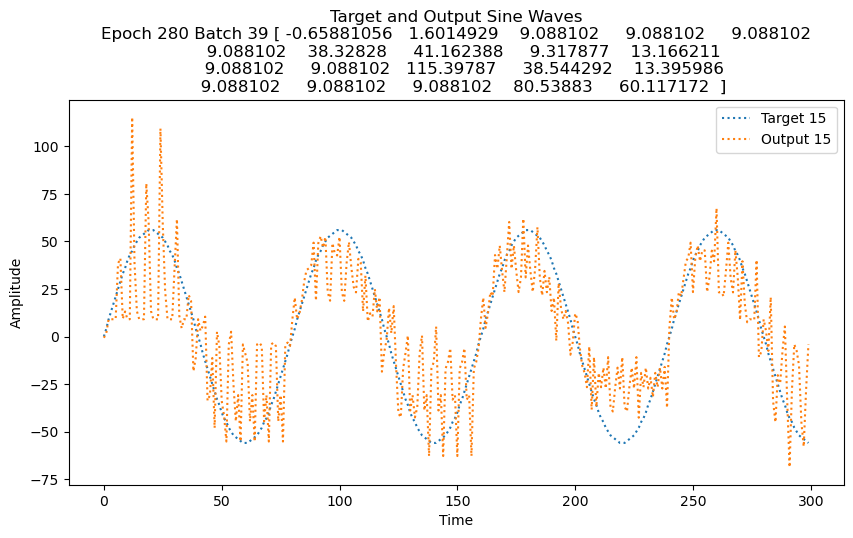

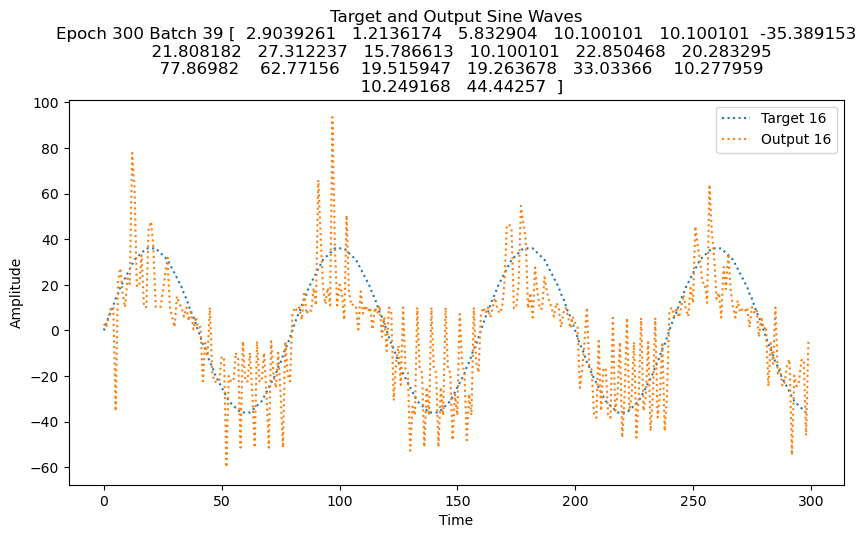

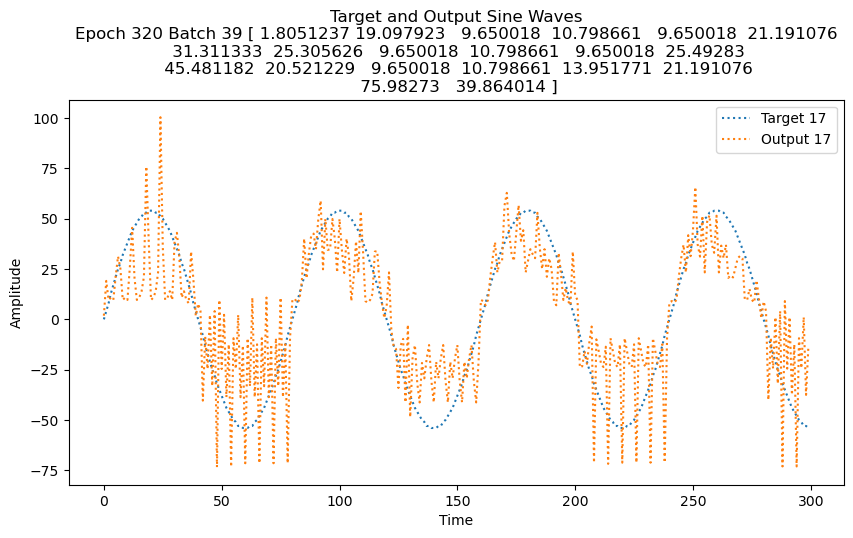

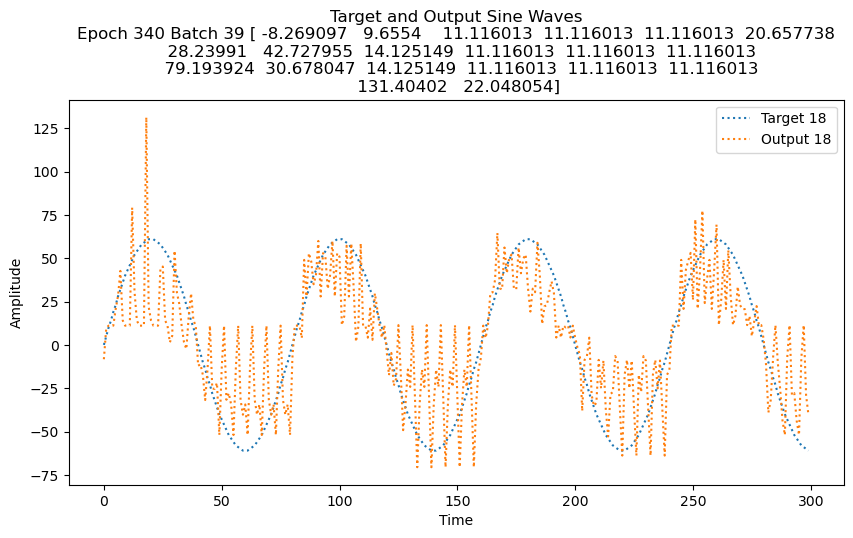

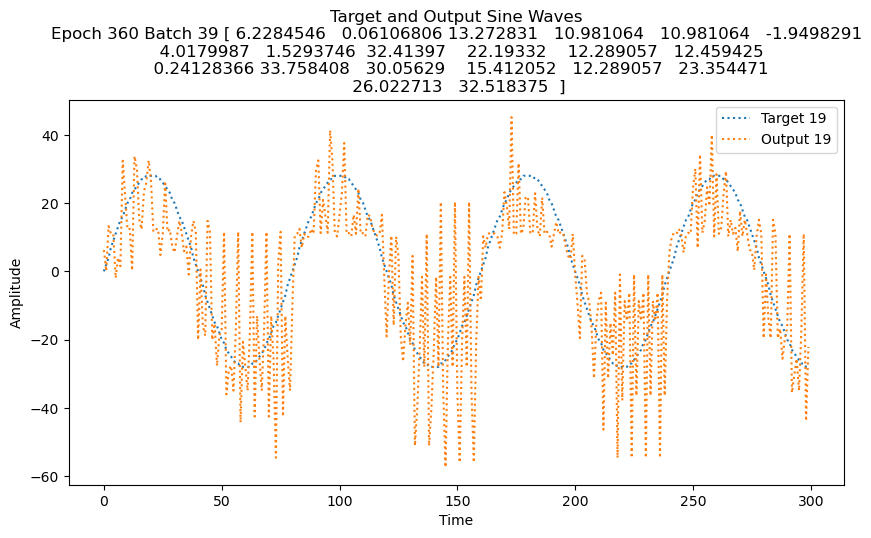

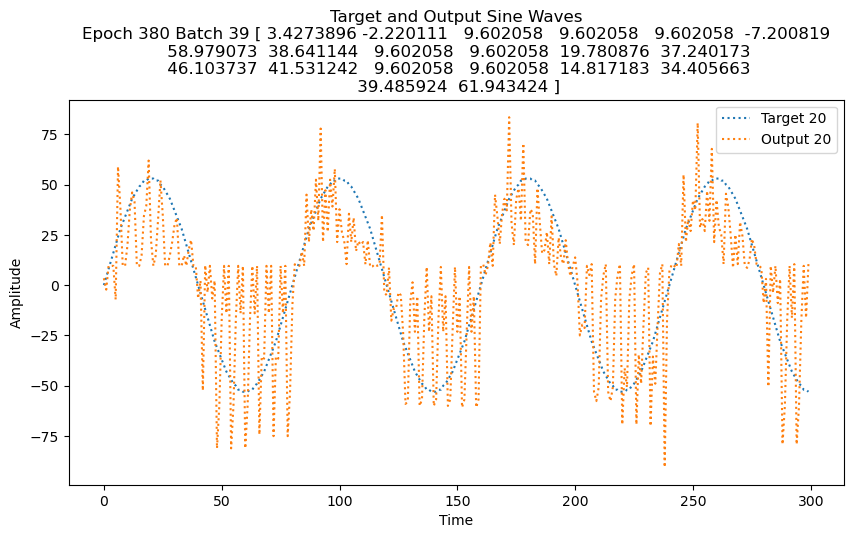

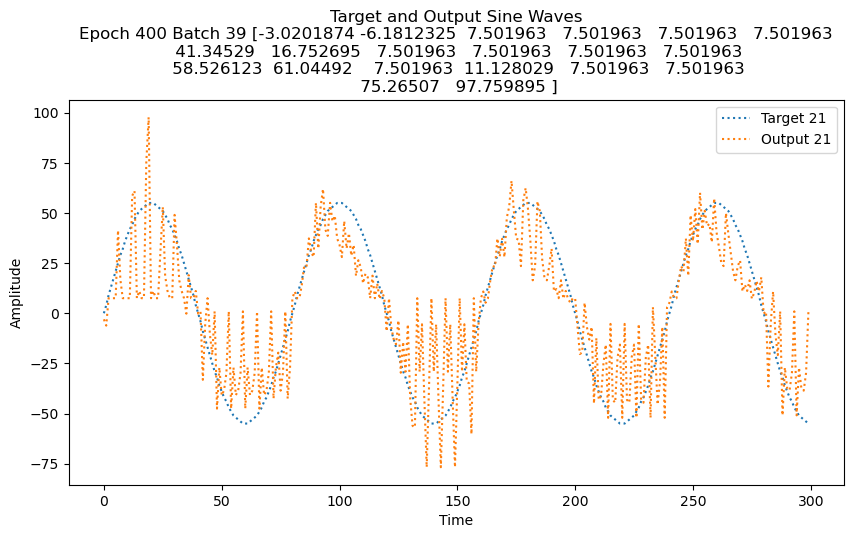

In [3]:
# Directory containing the NPZ files
data_dir = 'data2'

# Epochs of interest (0, 20, 40, ..., 400)
epochs = range(0, 401, 20)
batch = 39

# Initialize lists to hold target and output data for each epoch
targets_list = []
outputs_list = []

# Load data from NPZ files
for epoch in epochs:
    file_name = f'level1_loss1_epoch{epoch}_batch{batch}.npz'
    file_path = os.path.join(data_dir, file_name)
    
    if os.path.exists(file_path):
        data = np.load(file_path)
        targets = data['stargets'][24]
        outputs = data['soutputs'][24]
        
        # Assuming targets and outputs are of shape (25, ...)
        targets_list.append(targets)
        outputs_list.append(outputs)
    else:
        print(f"File {file_name} not found.")

# Plotting the target and output sine waves for each epoch
for i, epoch in enumerate(epochs):
    if i < len(targets_list):
        targets = targets_list[i]
        outputs = outputs_list[i]
        
        plt.figure(figsize=(10, 5))
        plt.plot(targets, linestyle='dotted',label=f'Target {i+1}')
        plt.plot(outputs, linestyle='dotted', label=f'Output {i+1}')
        
        plt.title(f'Target and Output Sine Waves\nEpoch {epoch} Batch {batch} {outputs[:20]}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.show()
    else:
        print(f"No data for epoch {epoch}.")


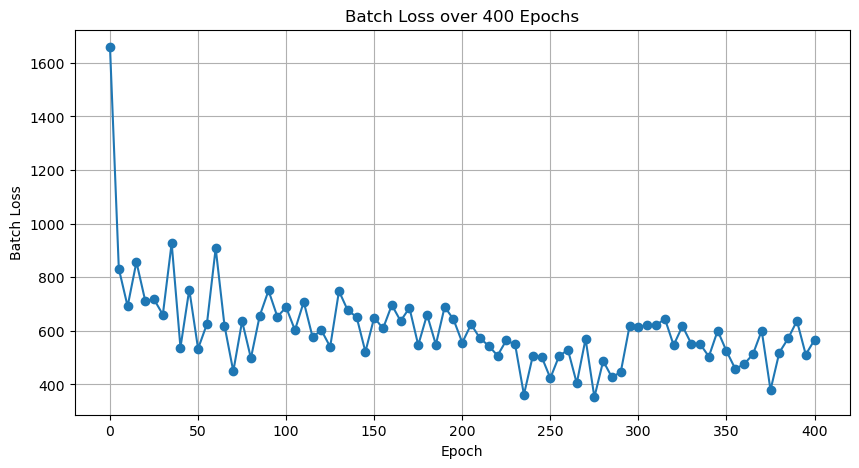

In [4]:
# Directory containing the NPZ files
data_dir = 'data2'

# Initialize lists to hold the epoch numbers and batch loss values
epochs = range(0, 401, 5)  # Since epochs are recorded every 5 epochs
batch_loss_values = []

# Load batch loss data from NPZ files
for epoch in epochs:
    file_name = f'level1_loss0_epoch{epoch}_batch0.npz'  # Assuming batch 0 is representative
    file_path = os.path.join(data_dir, file_name)
    
    if os.path.exists(file_path):
        data = np.load(file_path)
        batch_loss = data['sbatch_loss']
        batch_loss_values.append(batch_loss)
    else:
        print(f"File {file_name} not found.")
        batch_loss_values.append(None)

# Remove None values and corresponding epochs if any file was not found
epochs = [epoch for epoch, loss in zip(epochs, batch_loss_values) if loss is not None]
batch_loss_values = [loss for loss in batch_loss_values if loss is not None]

# Plotting the batch loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, batch_loss_values, marker='o')
plt.title('Batch Loss over 400 Epochs')
plt.xlabel('Epoch')
plt.ylabel('Batch Loss')
plt.grid(True)
plt.show()


File level1_loss0_epoch500_batch0.npz not found.


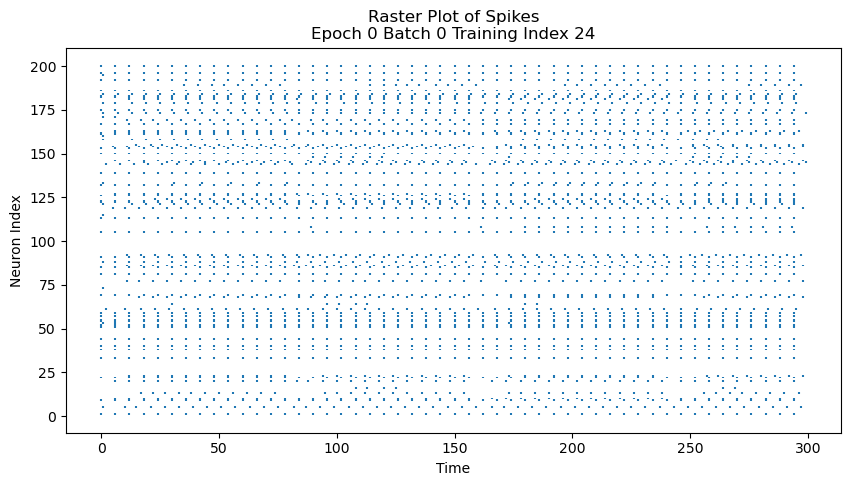

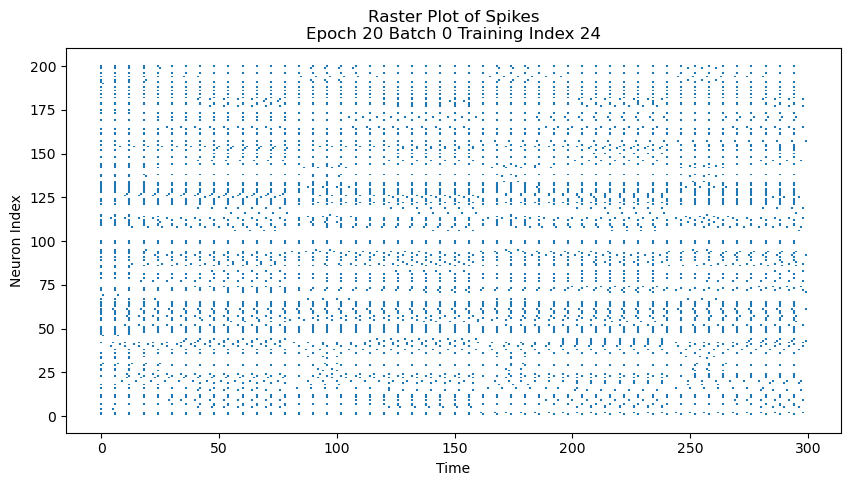

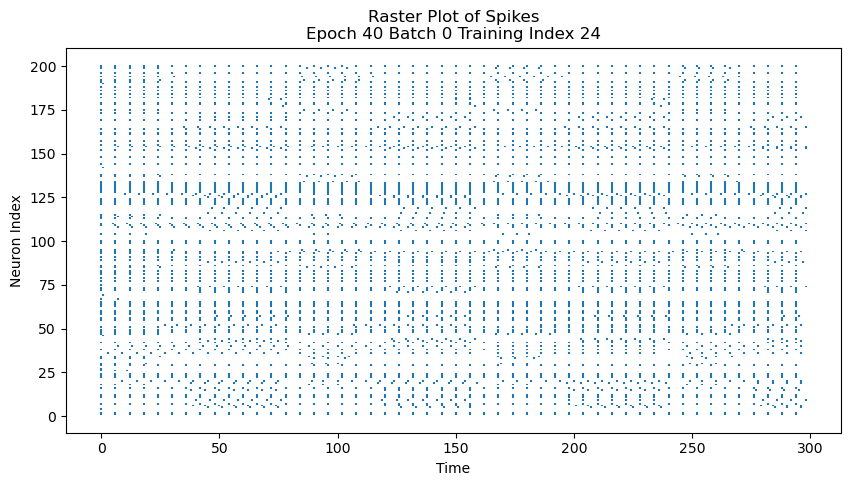

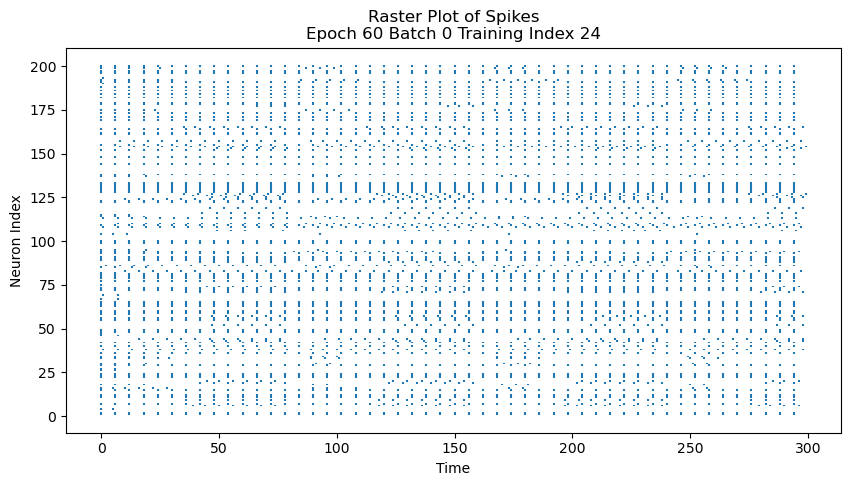

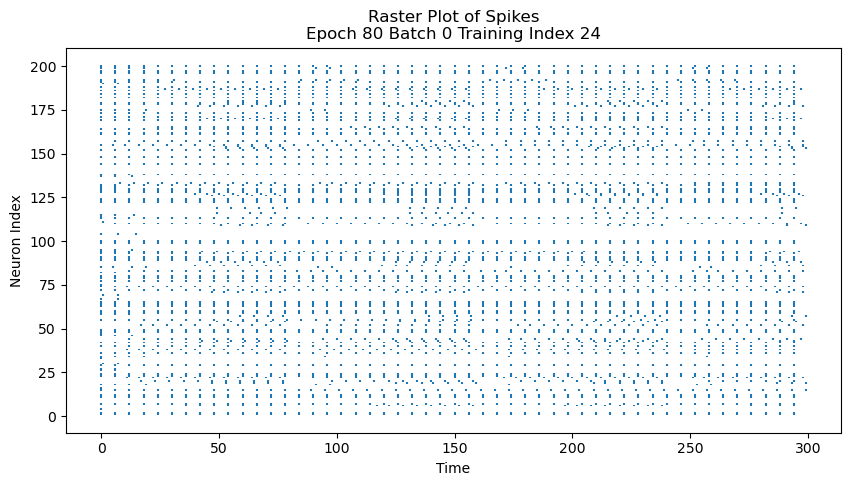

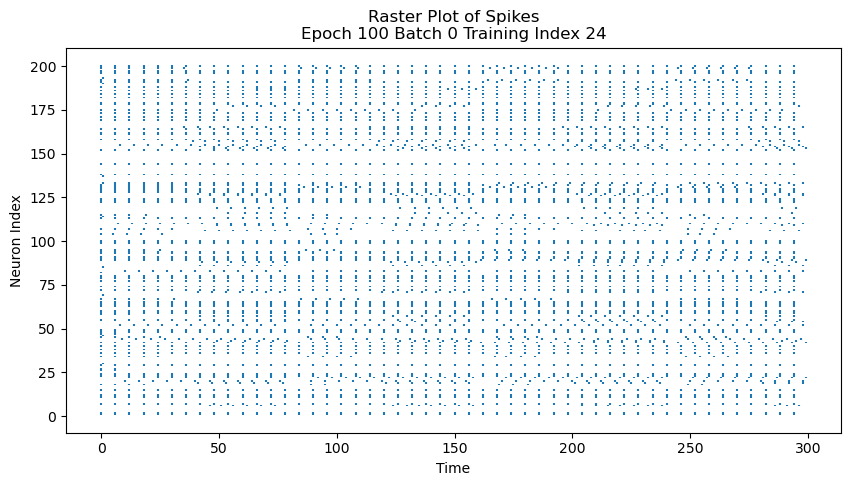

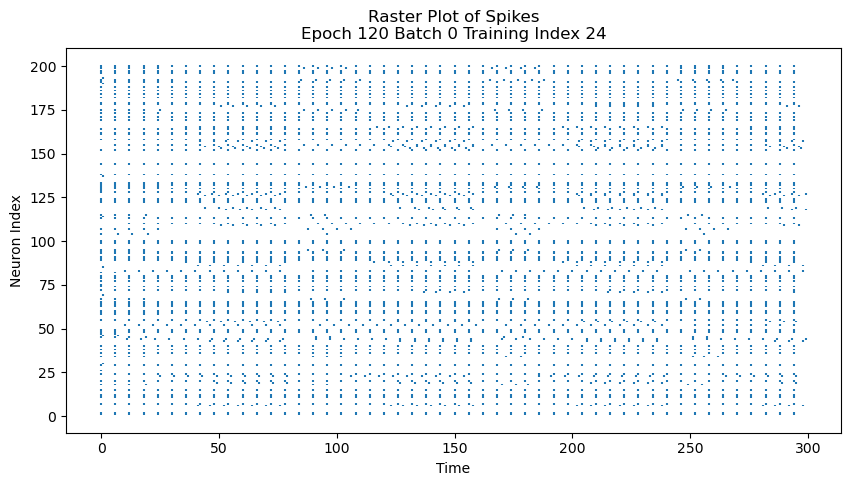

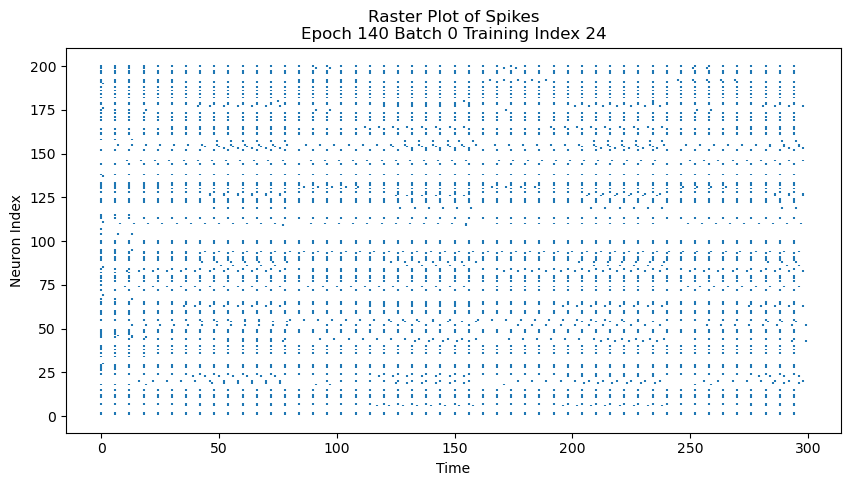

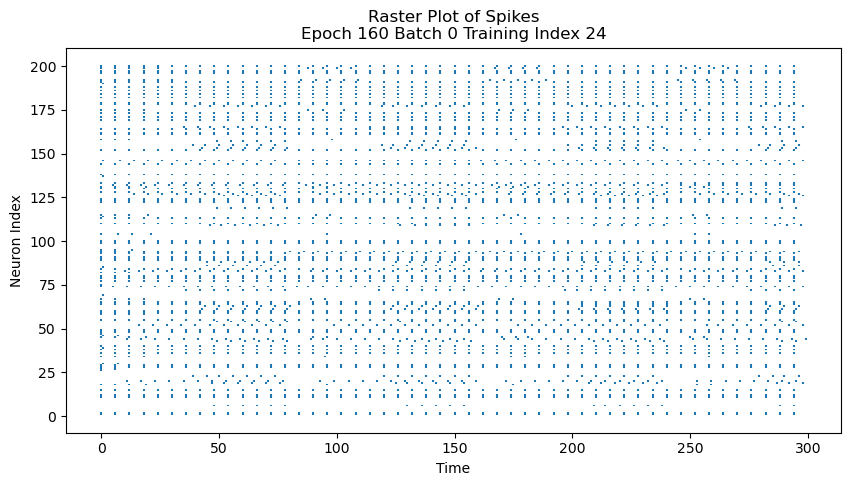

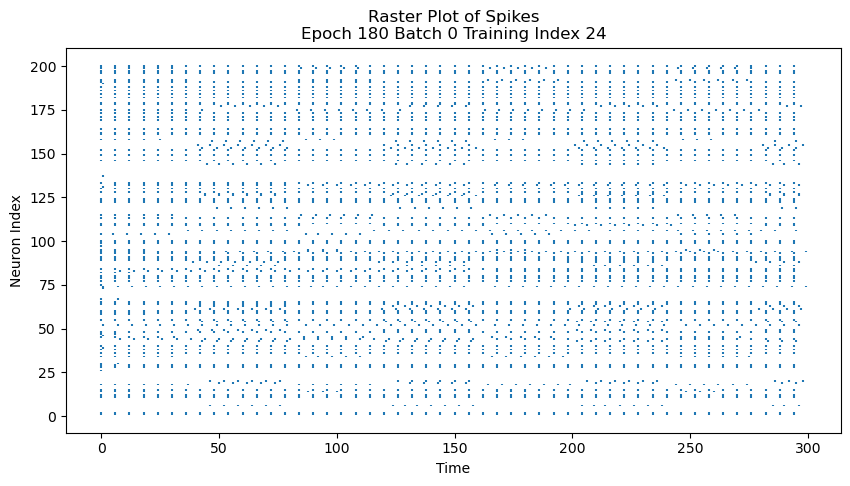

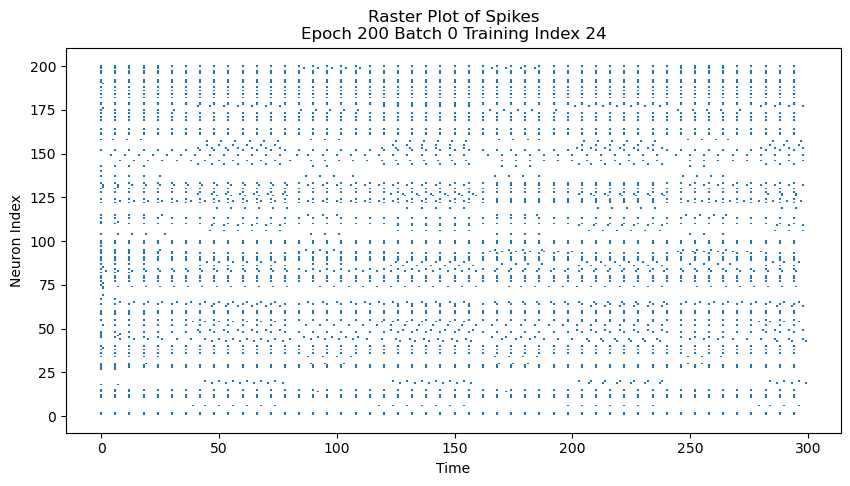

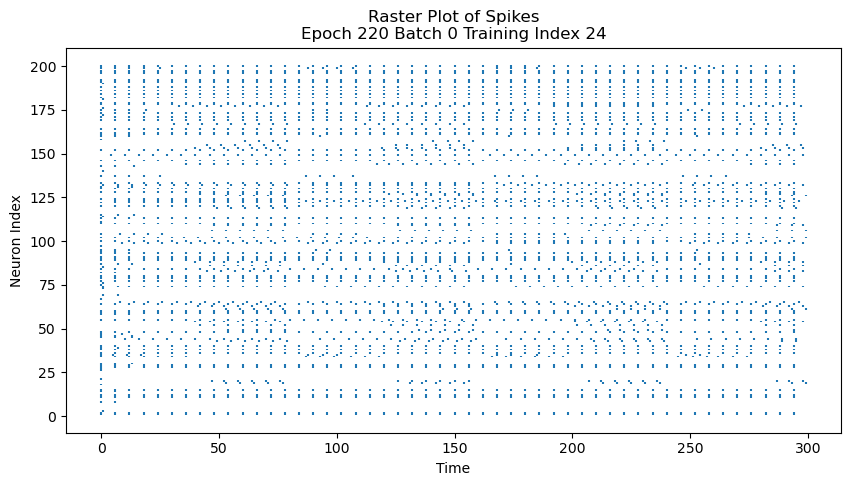

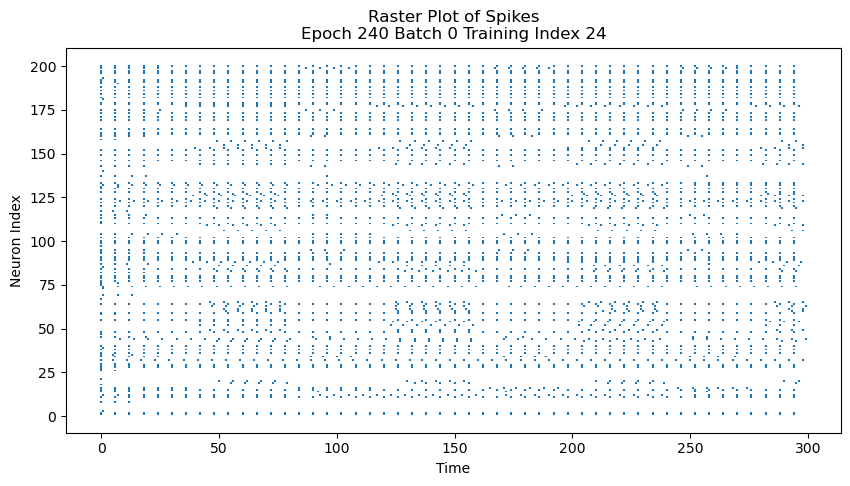

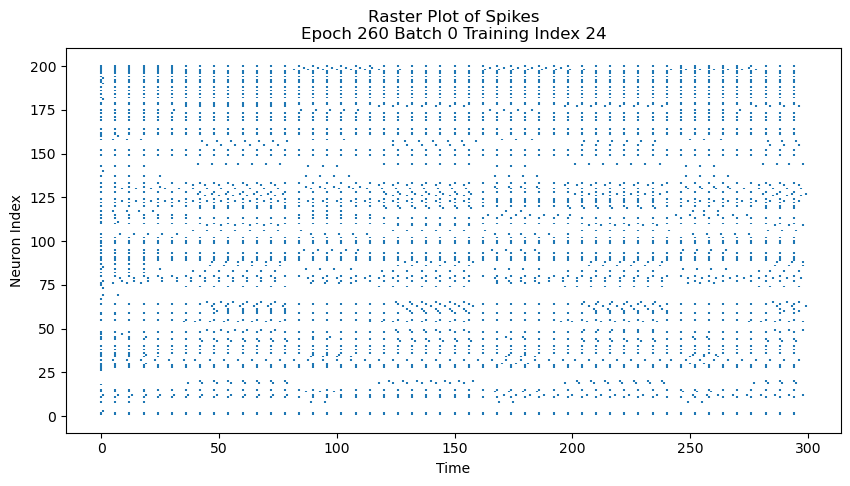

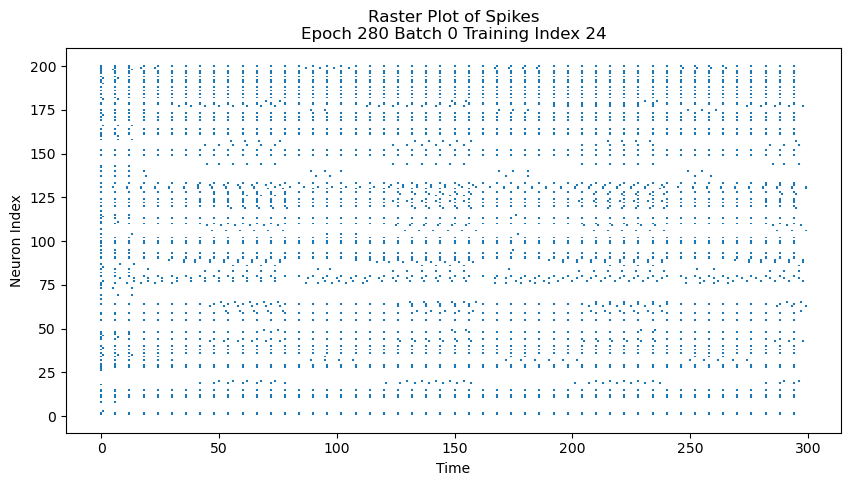

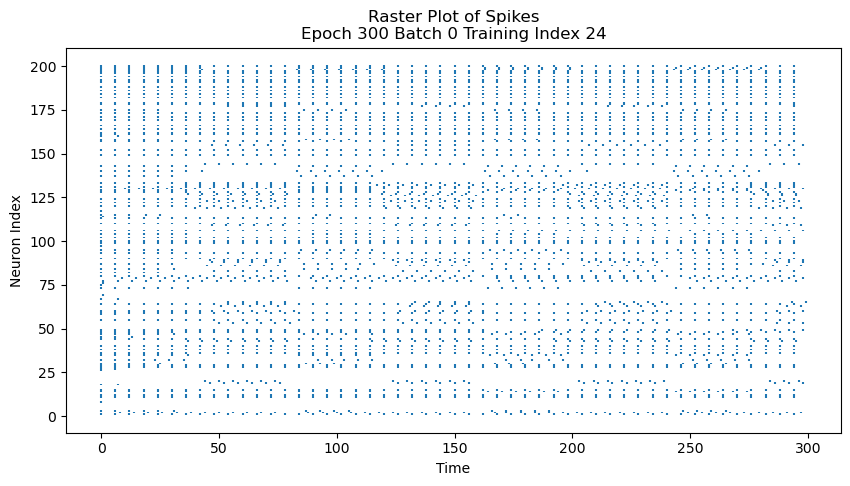

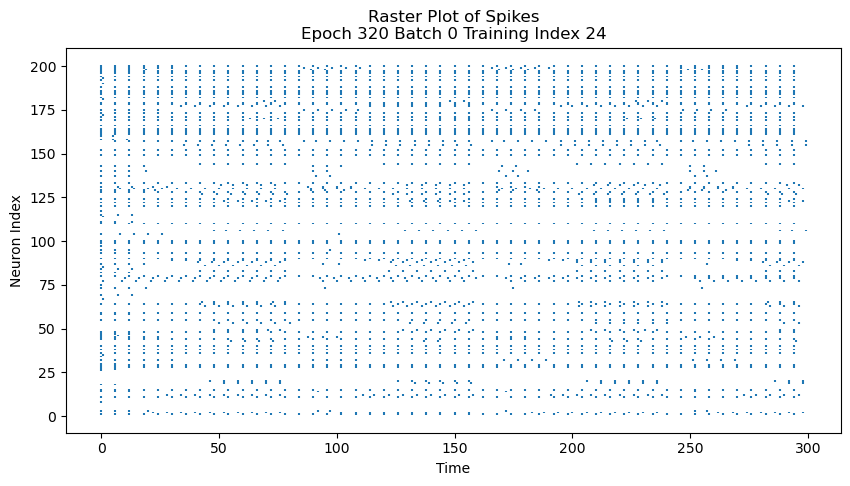

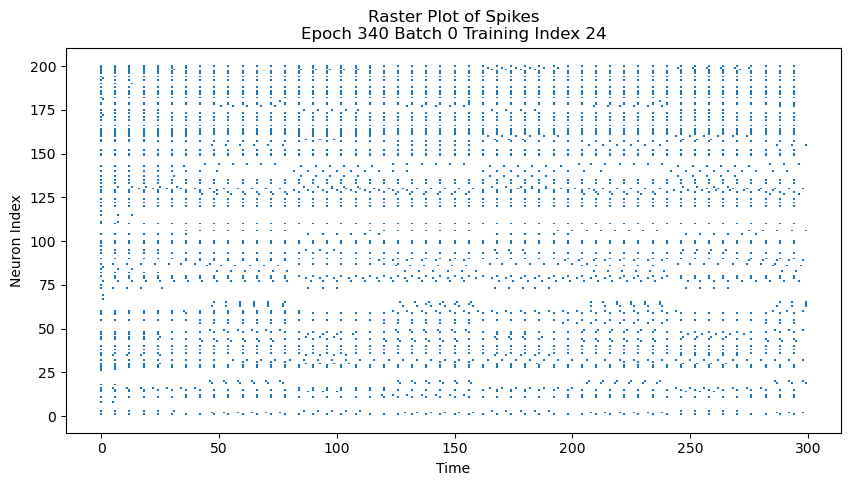

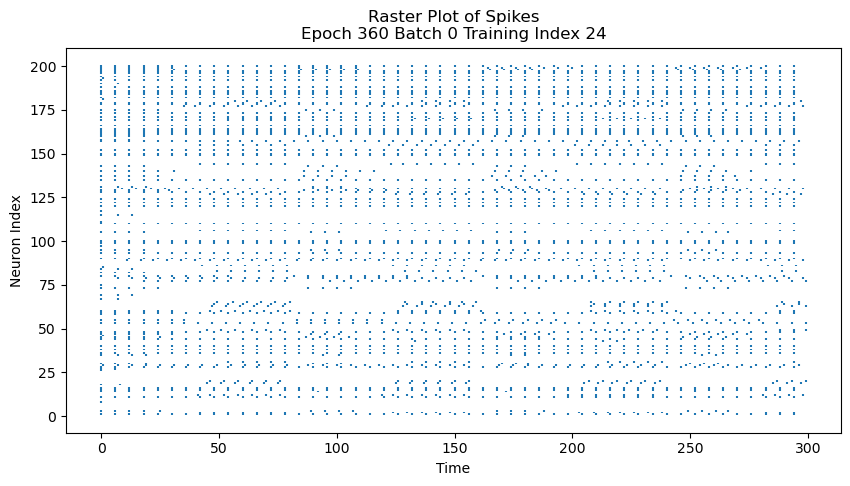

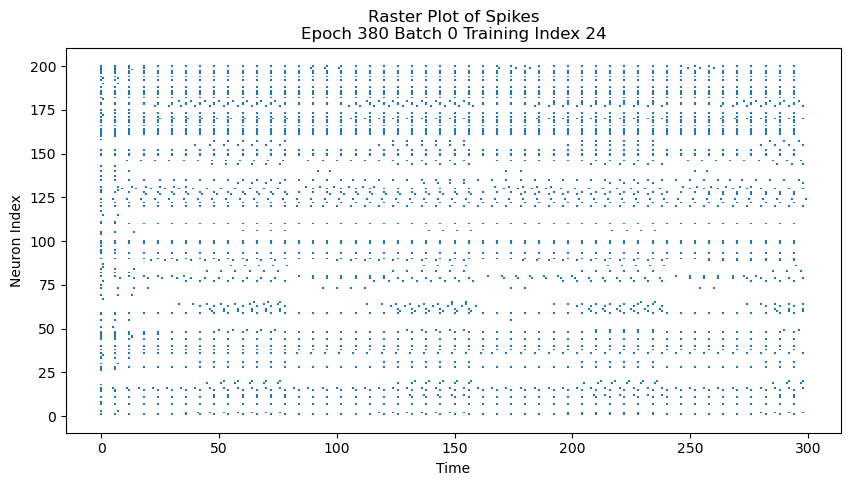

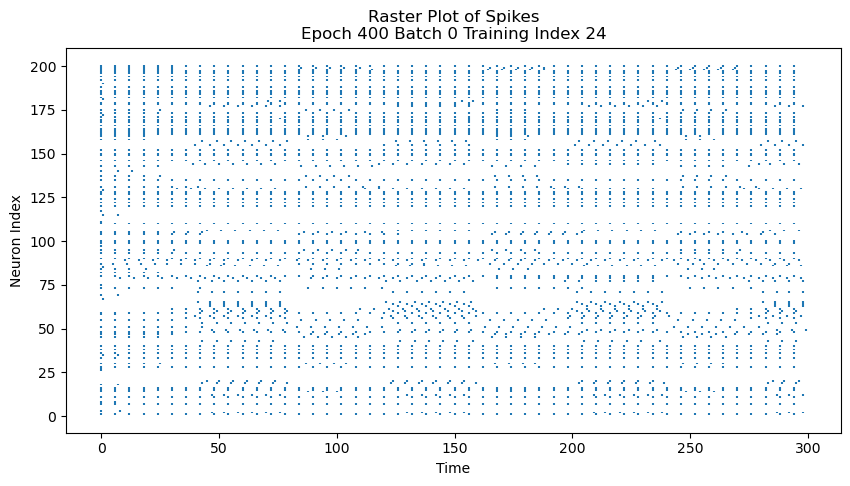

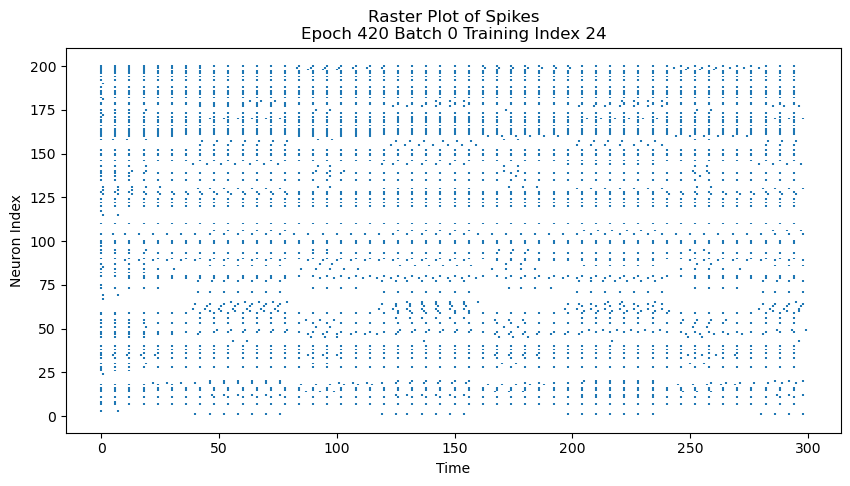

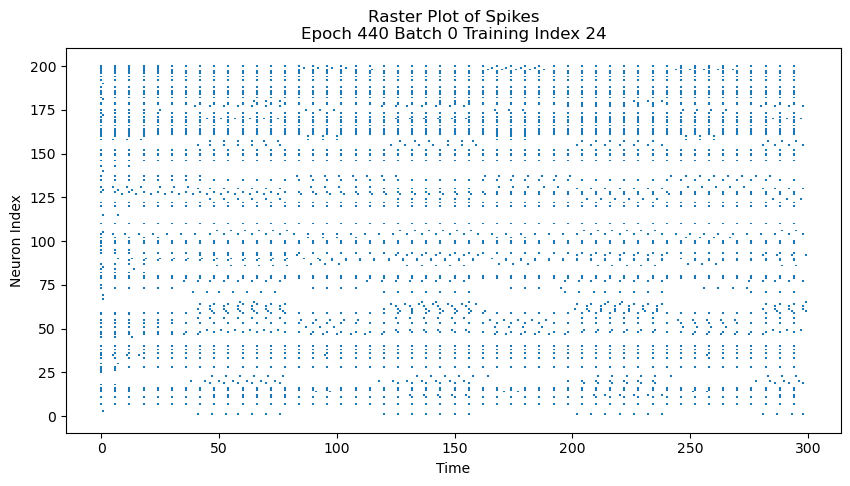

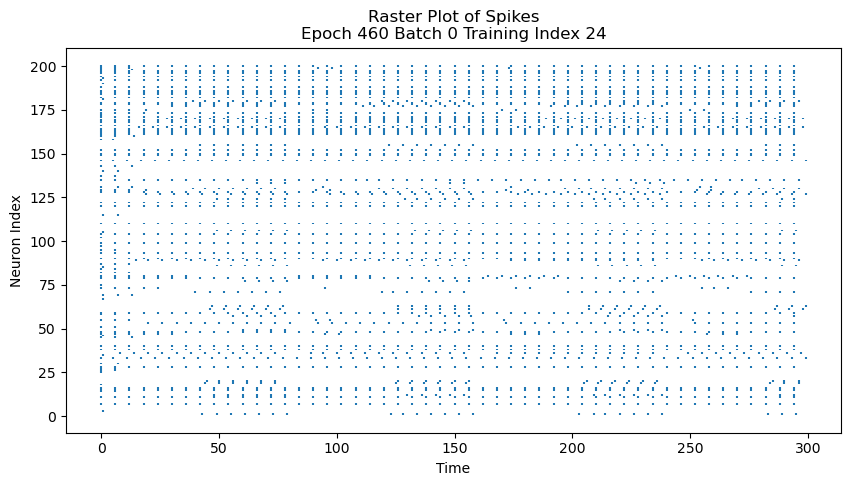

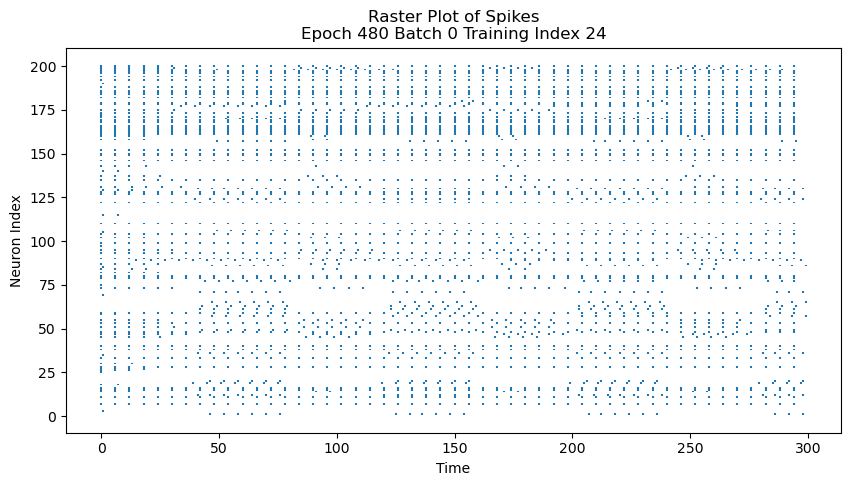

No data for epoch 500.


In [5]:
import torch
# Directory containing the NPZ files
data_dir = 'data2'

# Epochs of interest (0, 20, 40, ..., 400)
epochs = range(0, 501, 20)
batch = 0
training_index = 24

# Initialize a list to hold spikes data
spikes_list = []

# Load spikes data from NPZ files
for epoch in epochs:
    file_name = f'level1_loss0_epoch{epoch}_batch{batch}.npz'
    file_path = os.path.join(data_dir, file_name)
    
    if os.path.exists(file_path):
        data = np.load(file_path)
        spikes = data['sspikes']
        # Append the spikes of the 24th index training data
        spikes_list.append(spikes)
    else:
        print(f"File {file_name} not found.")

# Plotting the spikes in a raster plot for each 20th epoch
for i, epoch in enumerate(epochs):
    if i < len(spikes_list):
        spikes = spikes_list[i]
        
        plt.figure(figsize=(10, 5))
        for neuron, spike_train in enumerate(spikes):
            spike_times = np.where(spike_train > 0)[0]  # Assuming spikes are indicated by positive values
            plt.vlines(spike_times, neuron + 0.5, neuron + 1.5)
        
        plt.title(f'Raster Plot of Spikes\nEpoch {epoch} Batch {batch} Training Index {training_index}')
        plt.xlabel('Time')
        plt.ylabel('Neuron Index')
        plt.show()
    else:
        print(f"No data for epoch {epoch}.")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to load weights from npz file
def load_weights(npz_file):
    data = np.load(npz_file)
    rec_weights = data['srec_weights']  # Shape: 200x200
    output_weights = data['soutput_weights']  # Shape: 1x200
    return rec_weights, output_weights

# Initialize lists to store weight differences
rec_weight_diffs = []
output_weight_diffs = []

# Define epochs to compare
epochs_to_compare = range(0, 401, 20)  # From epoch 0 to epoch 400 in steps of 20

# Load and compare weights for each pair of epochs
for epoch in epochs_to_compare:
    epoch_file1 = f'data2/level1_loss0_epoch0_batch0.npz'
    epoch_file2 = f'data2/level1_loss0_epoch{epoch}_batch19.npz'  # Assuming batch 19 has the last recorded batch

    # Load weights for epoch 0
    rec_weights1, output_weights1 = load_weights(epoch_file1)

    # Load weights for epoch 20
    rec_weights2, output_weights2 = load_weights(epoch_file2)
    
    count_above_20 = np.sum(rec_weights2 > 20)
    count_below_40 = np.sum(rec_weights2 < -40)
    
    print("count_above_20",count_above_20, "count_below_40",count_below_40)

    # Compute weight differences
    rec_weight_diff = rec_weights2 - rec_weights1
    output_weight_diff = output_weights2 - output_weights1

    # Append differences to lists
    rec_weight_diffs.append(rec_weight_diff)
    output_weight_diffs.append(output_weight_diff)

# Plotting the heatmaps
fig, axs = plt.subplots(len(epochs_to_compare), 2, figsize=(18, 8* len(epochs_to_compare)))  # Adjusted figsize
fig1, axs1 = plt.subplots(len(epochs_to_compare), 2, figsize=(70, 8* len(epochs_to_compare)))  # Adjusted figsize


for i, epoch in enumerate(epochs_to_compare):
    im1 = axs[i, 0].imshow(rec_weight_diffs[i], cmap='coolwarm', interpolation='nearest')
    axs[i, 0].set_title(f'Rec Weight Diff (Epoch0 - Epoch {epoch+20})')
    fig.colorbar(im1, ax=axs[i, 0])

    im2 = axs1[i, 1].imshow(output_weight_diffs[i], cmap='coolwarm', interpolation='nearest')
    axs1[i, 1].set_title(f'Output Weight Diff (Epoch {epoch} - Epoch {epoch+20})')
    fig1.colorbar(im2, ax=axs[i, 1])

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def load_weights(npz_file):
    data = np.load(npz_file)
    rec_weights = data['srec_weights']  # Shape: 200x200
    output_weights = data['soutput_weights']  # Shape: 1x200
    return rec_weights, output_weights

# Initialize lists to store weight differences
rec_weight_diffs = []
output_weight_diffs = []

# Define epochs to compare
epochs_to_compare = range(0, 401, 20)  # From epoch 0 to epoch 400 in steps of 20

# Load and compare weights for each pair of epochs
for epoch in epochs_to_compare:
    epoch_file1 = f'data2/level1_loss0_epoch0_batch0.npz'
    epoch_file2 = f'data2/level1_loss0_epoch{epoch}_batch19.npz'  # Assuming batch 19 has the last recorded batch

    # Load weights for epoch 0
    rec_weights1, output_weights1 = load_weights(epoch_file1)
    
    # Assuming data contains the weights matrices
    rec_weights = data['srec_weights']  # Shape: 200x200
    output_weights = data['soutput_weights']  # Shape: 1x200

    # Plotting rec_weights heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(rec_weights, cmap='viridis')
    plt.title('Recurrent Weights Heatmap')
    plt.xlabel('Neuron Index')
    plt.ylabel('Neuron Index')
    plt.show()

    # Plotting output_weights heatmap
    plt.figure(figsize=(10, 1))
    sns.heatmap(output_weights, cmap='viridis', cbar=False)
    plt.title('Output Weights Heatmap')
    plt.xlabel('Weight Index')
    plt.show()


In [ ]:
#only task loss
import numpy as np
import matplotlib.pyplot as plt
import torch
from snntorch import spikeplot as splt
import os

# Directory containing the NPZ files
data_dir = 'data2'

# Epochs of interest (0, 20, 40, ..., 400)
epochs = range(0, 501, 20)
batch = 0

# Initialize lists to hold target and output data for each epoch
targets_list = []
outputs_list = []

# Load data from NPZ files
for epoch in epochs:
    file_name = f'level1_loss0_epoch{epoch}_batch{batch}.npz'
    file_path = os.path.join(data_dir, file_name)
    
    if os.path.exists(file_path):
        data = np.load(file_path)
        targets = data['stargets'][24]
        outputs = data['soutputs'][24]
        
        # Assuming targets and outputs are of shape (25, ...)
        targets_list.append(targets)
        outputs_list.append(outputs)
    else:
        print(f"File {file_name} not found.")

# Plotting the target and output sine waves for each epoch
for i, epoch in enumerate(epochs):
    if i < len(targets_list):
        targets = targets_list[i]
        outputs = outputs_list[i]
        
        plt.figure(figsize=(10, 5))
        plt.plot(targets, linestyle='dotted',label=f'Target {i+1}')
        plt.plot(outputs, linestyle='dotted', label=f'Output {i+1}')
        
        plt.title(f'Target and Output Sine Waves\nEpoch {epoch} Batch {batch}')
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.show()
    else:
        print(f"No data for epoch {epoch}.")

In [ ]:
file_name = f'level1_loss0_epoch{480}_batch{0}.npz'
file_path = os.path.join(data_dir, file_name)
    
if os.path.exists(file_path):
    data = np.load(file_path)
    spikes1 = data['sspikes']
    out_layer = data['soutput_weights']
    

In [ ]:
print(torch.from_numpy(spikes1).shape)

In [ ]:
plt.figure(figsize=(10, 5))
for neuron, spike_train in enumerate(spikes1):
    spike_times = np.where(spike_train > 0)[0]  # Assuming spikes are indicated by positive values
    plt.vlines(spike_times, neuron + 0.5, neuron + 1.5)

plt.title(f'Raster Plot of Spikes\nEpoch {480} Batch {batch} Training Index 24')
plt.xlabel('Time')
plt.ylabel('Neuron Index')
plt.show()

In [ ]:
def count_ones(tens):
    num_ones = 0
    for i in tens:
        if i == 1: num_ones += 1
    return num_ones

In [ ]:
#calculate all the neurons that are only active in one state of the sine wave, either positive or negative
positive_ranges = [(0, 40),(80, 120), (160, 200),(240, 280)]
spikes1 = torch.from_numpy(spikes1)
spikes1 = spikes1.to(torch.int)
# Convert ranges to mask for positive_sine neurons
positive_mask = torch.zeros(300, dtype=torch.bool)
for start, end in positive_ranges:
    positive_mask[start:end+1] = True

# Invert the mask for negative_sine neurons
negative_mask = ~positive_mask

# Lists to store indices of positive_sine and negative_sine neurons
positive_sine_indices = []
negative_sine_indices = []
zero_tensor = torch.zeros(spikes1.shape[1])

# Iterate through each neuron
for i in range(spikes1.shape[0]):
    neuron_firings = spikes1[i, :]
    
    # Classify the neuron
    if torch.all(neuron_firings == zero_tensor) | count_ones(neuron_firings) < 4:
        pass
    elif torch.all(neuron_firings & positive_mask == neuron_firings)&torch.all(neuron_firings & negative_mask == zero_tensor):
        positive_sine_indices.append(i)
    elif torch.all(neuron_firings & negative_mask == neuron_firings)&torch.all(neuron_firings & positive_mask == zero_tensor):
        negative_sine_indices.append(i)

# Output the results
print("Positive sine neuron indices:", positive_sine_indices)
print("Negative sine neuron indices:", negative_sine_indices)



In [ ]:
import random
pos_neg_indices = sorted(positive_sine_indices + negative_sine_indices)

def generate_nonzero_random():
    while True:
        num = int(random.uniform(-4, 4))  # Generate a random float between -4 and 4
        if num != 0:
            return num
        
for neur in pos_neg_indices:
    for timestep in range(spikes1.shape[1]):
        if spikes1[neur,timestep] == 1:
            jitter = generate_nonzero_random()
            if (timestep+jitter >= 0) & (timestep+jitter < 300):
                spikes1[neur,timestep] == 0
                spikes1[neur,timestep+jitter] == 1
            

In [ ]:
# out_layer = torch.from_numpy(out_layer)
out_layer = out_layer.to(float)
spikes1 = spikes1.to(float)
output = torch.matmul(spikes1.T, out_layer.T)
targets = data['stargets'][24]
      

# Plotting the target and output sine waves for each epoch
plt.figure(figsize=(10, 5))
plt.plot(targets, linestyle='dotted',label=f'Target {i+1}')
plt.plot(output, linestyle='dotted', label=f'Output {i+1}')

plt.title(f'Target and Output Sine Waves\nEpoch 480 Batch {batch}')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [ ]:
#only task loss
import numpy as np
import matplotlib.pyplot as plt
import torch
from snntorch import spikeplot as splt
import os

for neur in range(spikes1.shape[0]):
    for timestep in range(spikes1.shape[1]):
        if spikes1[neur,timestep] == 1:
            jitter = generate_nonzero_random()
            if (timestep+jitter >= 0) & (timestep+jitter < 300):
                spikes1[neur,timestep] == 0
                spikes1[neur,timestep+jitter] == 1
            

In [ ]:
# out_layer = torch.from_numpy(out_layer)
out_layer = out_layer.to(float)
spikes1 = spikes1.to(float)
output = torch.matmul(spikes1.T, out_layer.T)
targets = data['stargets'][24]
      

# Plotting the target and output sine waves for each epoch
plt.figure(figsize=(10, 5))
plt.plot(targets, linestyle='dotted',label=f'Target {i+1}')
plt.plot(output, linestyle='dotted', label=f'Output {i+1}')

plt.title(f'Target and Output Sine Waves\nEpoch 480 Batch {batch}')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [ ]:
data_dir = 'data2'
file_name = 'level1_loss0_epoch480_batch0.npz'
file_path = os.path.join(data_dir, file_name)

if os.path.exists(file_path):
        data = np.load(file_path)
        #shape 200x200 and 1x200,epoch 495, batch 39, training data 24
        l1_mx = torch.from_numpy(data['sinput_weights']).T  #2x200
        rec_mx = torch.from_numpy(data['srec_weights']).T #200x200
        l2_mx = torch.from_numpy(data['soutput_weights']).T #200x1